# CUSTOMER CHURN PREDICTION
-PROJECT

## By Prateek Tripathi 
   ## CSE

### Abstract : 

## Churn Prediction

Churn means "leaving the company". 
It is very critical for business to have an idea about why and when customers are likely to churn. Having a robust and accurate churn prediction model helps businesses to take actions to prevent customers from leaving the company.

In this project, I will use "Telco Customer Churn" data set which is available on Kaggle.
There are 20 featuures (independent variables) and 1 target (dependent) variable for 7043 customers. Target variable indicates if a customer has has left the company (i.e. churn=yes) within the last month. Since the target variable has two states (yes/no or 1/0), this is a binary classification problem.

The variables are:

customerID: Customer ID.

gender: Gender of customer.

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0).

Partner: Whether the customer has a partner or not (Yes, No).

Dependents: Whether the customer has dependents or not (Yes, No). 

tenure: Number of months the customer has stayed with the company. 

PhoneService: Whether the customer has a phone service or not (Yes, No). 

MultipleLines: Whether the customer Churn prediction is common use case in machine learning domain. If you are not familiar with the term, 
has multiple lines or not (Yes, No, No phone service).

InternetService: Customer’s internet service provider (DSL, Fiber optic, No). 

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service). 

OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service). 

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service). 

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service).

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service).

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service). 

Contract: The contract term of the customer (Month-to-month, One year, Two year).

PaperlessBilling: Whether the customer has paperless billing or not (Yes, No).

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Company transfer (automatic), Credit card (automatic)).

MonthlyCharges: The amount charged to the customer monthly TotalCharges: The total amount charged to the customer Churn: Whether the customer churned or not (Yes or No).

At first glance, only customerID seems irrelevant to customer churn. Other variables may or may not have an effect on customer churn. 


## What has been Provided by the customer (company):

	The customers dataset with historical data.

	From the column [Exited], we can identify the     customers who exited from the company and who     are continuing the services of company. The       value 1 represents the customers who are          exited from the company and 0 represents the      customers who are continuing with the company.


## Why this problem is important:

	Using the solution to this problem, the company can easily           identify the customers who are willing to exit the company soon.

	From the larger datasets, the company can easily identify the        churn customers using machine learning approach, thus this can       reduce the manual intervention and the cost to the company.          Using machine learning solutions, the company can save               processing time and manual intervention to investigate the           complete records. The system can take quicker decisions with         statistical models with optimal accuracy metrics.

	With the investigation of the customers who are churning soon,       the company has an option to reduce the churn by further             investigating the reason of leaving the company and to convince      the customers by providing or improvising the services rendered      to them. 


## Common Business applications: 

	The churn model can be integrated with the call center /             business software, so that the proper discounting can be             provided to the identified customers. Targeted marketing             strategies can be used.

	Monitoring of the customer trends and building the alerting          mechanism to the business users on a daily / monthly basis.

	This problem can be applicable to any industry (for e.g.,            Telecom) to identify the churn customers within their                organizations.


## PROBLEM STATEMENT

The classification model to be built on historical data and then used to predict the classes for the current customers to identify the churn.

## Importing Data Set

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dataframe

In [99]:
churn_predict_df = pd.read_csv("Telco-Customer-Churn.csv")

In [100]:
churn_predict_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
churn_predict_df.shape

(7043, 21)

## Exploring The Data Set - EDA

Finding Missing Values in the Data Set

In [102]:
churn_predict_df.isna().sum().sum()

0

There is no missing value in the data set.

Now I will continue the exploration.

In [103]:
churn_predict_df.columns 

#Listing the name of all the columns of the data set

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [104]:
churn_predict_df.dtypes

#Listing the name of all the data types available in the data set used.

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [105]:
churn_predict_df.Churn.value_counts()

#Counting the Number of "YES" and "NO" from the "Churn" Column of the data set

No     5174
Yes    1869
Name: Churn, dtype: int64

I got to know that the variable "Churn" has an unbalanced distribution of Positive Value (Churn = Yes) and Negative Value (Churn = No).

Now, According to my Knowledge; this situation of imbalance can inlunce the performance / Accuracy of my Machine Learning Model in a Negative way.

So I will use 'upsampling' and 'downsampling' to get rid of this situation.



Now at this particular point if I will figure out that which features of the data set are Independent ones , It will then help me to create a better Model.

In [106]:
columns = churn_predict_df.columns
binary_columns = []

for col in columns:
    if churn_predict_df[col].value_counts().shape[0] == 2:
        binary_columns.append(col)

binary_columns 

#Enlisting all the categories of the features of the data set which consist of two classes.

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

Now it appears that the remaining columns / features of the data set have more than two values.

In [107]:
# Columns / features of the data set with multiple values / classes
multiple_cols_cat = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

## Columns / Features with Binary (0/1) Values / Classes

Now I am going to check the whole distribution of values consisting binary features

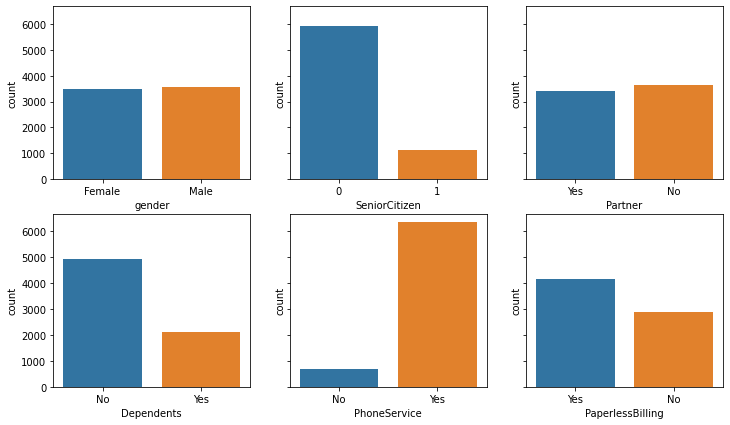

In [108]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("gender", data=churn_predict_df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=churn_predict_df, ax=axes[0,1])
sns.countplot("Partner", data=churn_predict_df, ax=axes[0,2])
sns.countplot("Dependents", data=churn_predict_df, ax=axes[1,0])
sns.countplot("PhoneService", data=churn_predict_df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=churn_predict_df, ax=axes[1,2])

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)



From the graphs plotted above, I can conclude that MOST of the customers are not senior citizens and in the likewise manner MOST of the customers have phone service.

Now let us find out the behavoiur of our target column / feature in accordance with the binary values . 
 
In order to do that I need to change the values of the target column viz-a-viz 'Yes' = 1 and 'No' = 0.

In [12]:
churn_numeric = {'Yes':1, 'No':0}
churn_predict_df.Churn.replace(churn_numeric, inplace=True)

churn_predict_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [13]:
churn_predict_df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


After observing the above result : We can conclude that the average Churn rate of Males and Females are approximately equivalent which means that the gender variable of the data set cannot help me in find a valuable prediction power to a model.

So , I am not going to use the gender variable in my Machine Learning Model

Now I will check other columns which have binary values .

This will help me in finding the valuable columns for my Machine Learning Model

In [14]:
churn_predict_df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [15]:
churn_predict_df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [16]:
churn_predict_df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [17]:
churn_predict_df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [18]:
churn_predict_df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


Now its clear that the other columns with binary values have an ample amount of effect on our Target column. 

Now we will check the relationship between the target column and other columns available in the data set.

In [19]:
table1 = pd.pivot_table(churn_predict_df, values='Churn', index=['gender'],columns=['SeniorCitizen'], aggfunc=np.mean)

table1

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


In [20]:
table2 = pd.pivot_table(churn_predict_df, values='Churn', index=['Partner'],columns=['Dependents'], aggfunc=np.mean)

table2

Dependents,No,Yes
Partner,,
No,0.342378,0.213296
Yes,0.254083,0.142367


## Other Columns / Features 

Now I will go through other columns / features. 

For starters, Let us have a look into "Interney service" Column. This column consists of 6 variables which show their influence iff the customes has internet service.

## Internet Service Column / Feature

<AxesSubplot:xlabel='InternetService', ylabel='count'>

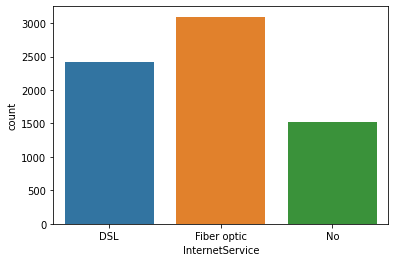

In [21]:
sns.countplot("InternetService", data=churn_predict_df)

Let us check the amount of effect this column is showering on the target column.

In [22]:
churn_predict_df[['InternetService','Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


We can observe that This column has a lot of effect on the prediction of the Churn Rate.

The customers with fiber optic are most likely to churn.Since there is not a big difference inthe number of customers with DSL and Fiber Optic.

May be the company has some problems with their fiber optics.

Since, we cannot make the assumptions based on a single varable, let us check the monthly charges.

In [23]:
churn_predict_df[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


We see that the cost of fiber optic is way more expensive than DSL which could be the reasons why customers churn.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

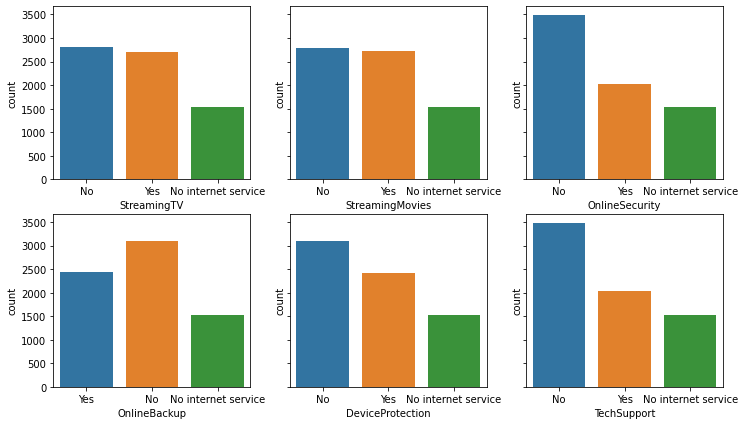

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("StreamingTV", data=churn_predict_df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=churn_predict_df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=churn_predict_df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=churn_predict_df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=churn_predict_df, ax=axes[1,1])
sns.countplot("TechSupport", data=churn_predict_df, ax=axes[1,2])

In [25]:
churn_predict_df[['StreamingTV','Churn']].groupby('StreamingTV').mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [26]:
churn_predict_df[['StreamingMovies','Churn']].groupby('StreamingMovies').mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [27]:
churn_predict_df[['OnlineSecurity','Churn']].groupby('OnlineSecurity').mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [28]:
churn_predict_df[['OnlineBackup','Churn']].groupby('OnlineBackup').mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [29]:
churn_predict_df[['DeviceProtection','Churn']].groupby('DeviceProtection').mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [30]:
churn_predict_df[['TechSupport','Churn']].groupby('TechSupport').mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


From the above Results from the services reated to Internet Services , we can conclude that they all seems to have different churn rate for their values.

## Phone Service Column / Feature

In [31]:
churn_predict_df.PhoneService.value_counts()

#Counting the number of YES and NO in Phone Service Column

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [32]:
churn_predict_df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

We can see that the multiplelines column gives us more specific data than our phoneservice column.

So we will use multiple line column in the model.

In [33]:
churn_predict_df[['MultipleLines','Churn']].groupby('MultipleLines').mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


Now let us have a look at the Contract and Paymentmethod columns.

<AxesSubplot:xlabel='Contract', ylabel='count'>

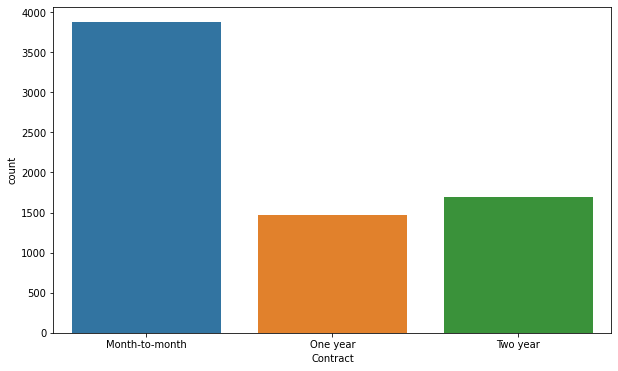

In [34]:
plt.figure(figsize=(10,6))
sns.countplot("Contract", data=churn_predict_df)

In [35]:
churn_predict_df[['Contract','Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


We can observe that the customers with 'month to month' contract are way more  likely to churn. Which significantly provides the motivation of having long term cotracts to thr companies.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

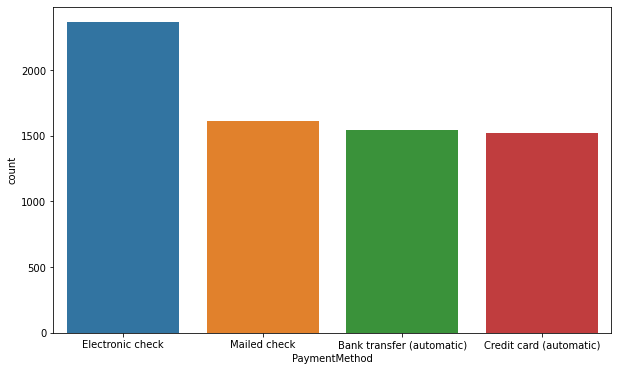

In [36]:
plt.figure(figsize=(10,6))
sns.countplot("PaymentMethod", data=churn_predict_df)

In [37]:
churn_predict_df[['PaymentMethod','Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


The columns 'tenure', 'monthly charges' and 'total charges' are the continuous ones. There is a proportional relation between thr amount in 'total charges ' and the 'Tenure' multiplied by 'monthly charges'. Which motivates us to include 'total charges' column in the model. 

Let us observe their sistribution.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

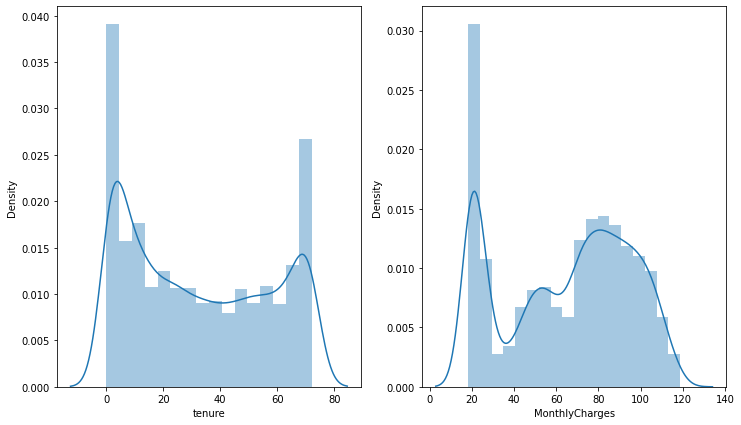

In [38]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))

sns.distplot(churn_predict_df["tenure"], ax=axes[0])
sns.distplot(churn_predict_df["MonthlyCharges"], ax=axes[1])

In [39]:
churn_predict_df[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


We know that the customers who are part of the company for a long span of time have a tendency to stay on the same course. 

People who left the comany have a average tenure of 20 months which is less than the average of the people who stay.

This led to a conclusion that 'monthly charges' have some influence on the churn rate.

In [40]:
churn_predict_df[['Contract','tenure']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


As per our Expectations , we can see that 'Contract' and 'tenure ' are highly relatable. 

But we also observe that 'contract' will add almost no value to the 'tenure' ,so it will be fruitful for the model to be trained without the 'contract' column. 

At the End of My Exploration Tour of the Data set, I cam to a decision that the columns listed below are not fruitful for my model : - 

1. TotalCharges

2. customerID

3. PhoneService

4. Contract

5. gender

So I am going to exclude them from my model.

In [41]:
churn_predict_df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [42]:
churn_predict_df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


The Reading and EDA part is complete. 

Now let us focus on the Preprocessing part.

Steps: 

1. scaling continuous variables.

2. Converting columns/ features with categories into numbers. 

3. There is lack of order in the categories of the columns / features, so we will have to encode them with numbers(0/1) such that the category with higher number  will be considered of atmost importance in liue of its effect on the model.

In [43]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [44]:
category_features = ['SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(churn_predict_df, columns=category_features, drop_first=True)

In [45]:
sc = MinMaxScaler()
m = sc.fit_transform(churn_predict_df[['tenure']])
n = sc.fit_transform(churn_predict_df[['MonthlyCharges']])

In [46]:
X['tenure'] = m
X['MonthlyCharges'] = n

In [47]:
X.shape

(7043, 26)

We know that target columns with value distribution out of balance are the least desired ones by the Machine Learing Models. 

To get rid of this situation we will use upsampling i.e. increment in the number of samples by randomly selecting rows from them.

## Resampling - Upsampling

Text(0.5, 1.0, 'Distribution in values Before Resampling')

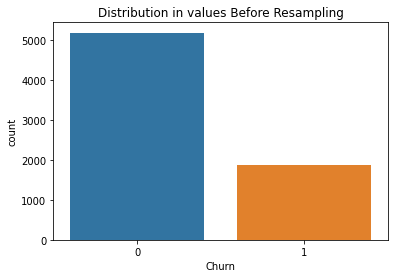

In [48]:
sns.countplot('Churn', data=churn_predict_df).set_title('Distribution in values Before Resampling')

In [49]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [50]:
print(len(X_no),len(X_yes))

5174 1869


In [51]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


In [52]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)

Text(0.5, 1.0, 'Distribution in values After Resampling')

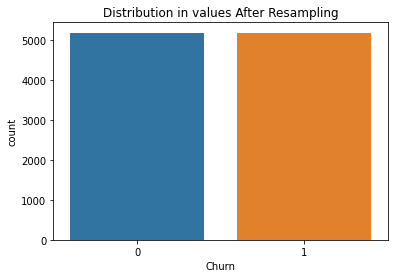

In [53]:
sns.countplot('Churn', data=X_upsampled).set_title('Distribution in values After Resampling')

Now its time for model training

## Machine Learning Model Training

For this purpose we need to divide the whole data set into test and training subset.

This will help us to find out the performance of the model on new samples.

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = X_upsampled.drop(['Churn'], axis=1) # columns / features (independent values)
y = X_upsampled['Churn'] #target columns / features (dependent values)

Now Let us train our model.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42) 

#change test_size to different values.....(0.2) , (0.3) , (0.4) and keep on testing

## Classifier = Random Forests Classifier

In [82]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
clasif_forest = RandomForestClassifier(n_estimators=100, max_depth=10)

In [85]:
# fitting Random forests classifier

clasif_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [86]:
# Predicting Training set

pred_ict = clasif_forest.predict(X_train)

In [87]:
#Score of Accuracy

accuracy_score(y_train, pred_ict)

0.88435520240524

Confusion Matrix

In [88]:
confusion_matrix(y_train, pred_ict)

array([[3861,  803],
       [ 274, 4375]], dtype=int64)

In [89]:
pred_test = clasif_forest.predict(X_test)

In [90]:
accuracy_score(y_test, pred_test)

0.8318840579710145

Accuracy Score : 

Training Set = 89 %

Test Set = 84 %

This difference in Accuracy Score shows us that there is mild overfitting. 

We can decrease the depth of the tree by carefully optimizing the parameters so that the result can be accurate.

Reducing the number of tree is also an option. It will let the reduce overfitting. 

Let us do cross validation and trial and different parameters with grid search cv.


In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

We are doing 5 folds of cross validation here (cv =5) .

it is like dividing the data ste into 5 subsets.

After each iteration 4 of the subsets are used in training the model and the other one subset is used aas a test set for the model.

After the completion of all the five iterations, the model will use all samples as both training and test samples. 

n_jobs parameter selects the no. of processors to be used. (-1 = all processors)

In [93]:
clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [94]:
clf.best_params_

{'max_depth': 25, 'n_estimators': 250}

In [95]:
clf.best_score_

0.8996913722935534

## Overall Accuracy = 90 % 

which is the mean of the cross validated score of the best_estimator.

